# Single Image Super Resolution Using Deep Convolutional Network

# Initialising all the pacage and necessary library

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import SGD, adam
import psnr
import numpy
import math
import os
import cv2
import h5py
import numpy
import matplotlib.pyplot as plt

Using TensorFlow backend.


# PSNR Function

In [2]:
def psnr(target, ref):
    # assume RGB image
    target_data = numpy.array(target, dtype=float)
    ref_data = numpy.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(numpy.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

# Readin Training Data

In [3]:
def read_training_data(file):
    with h5py.File(file, 'r') as hf:
        data = numpy.array(hf.get('data'))
        label = numpy.array(hf.get('label'))
        train_data = numpy.transpose(data, (0, 2, 3, 1))
        train_label = numpy.transpose(label, (0, 2, 3, 1))
        return train_data, train_label

# Designing the CNN Model architecture 

In [81]:
def model():
    SRCNNIA = Sequential()
    SRCNNIA.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
    SRCNNIA.add(Activation('relu')) 
    SRCNNIA.add(Conv2D(32,(1,1),padding='same'))
    SRCNNA.add(Activation('relu'))
    SRCNNIA.add(Conv2D(1,(5,5),padding='same'))
    Adam = adam(lr=0.001)
    SRCNNIA.compile(optimizer=Adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNNIA


# Predicting the HR Image from LR image

In [90]:
def predict():
    srcnn_model = model()
    srcnn_model.load_weights("m_model_adam30_64.h5")
    IMG_NAMEO ="./Test/Set14/WTruckHr.JPG"
    IMG_NAME = "./Test/Set14/WTruckLr.jpg"
    INPUT_NAME = "inputWR.jpg"
    OUTPUT_NAME = "pre_adam30cecropWRN.jpg"
    

    import cv2
    imgo = cv2.imread(IMG_NAMEO)
    img = cv2.imread(IMG_NAME)
    shape = img.shape
    #img = cv2.resize(img, (int(shape[1] / 2), int(shape[0] / 2)))
    
    img = cv2.resize(img, (shape[1]*2, shape[0]*2), cv2.INTER_CUBIC)
    cv2.imwrite(INPUT_NAME, img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    Y = numpy.zeros((1, img.shape[0], img.shape[1], 1))
    Y[0, :, :, 0] = img[:, :, 0]
    pre = srcnn_model.predict(Y, batch_size=1)
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(numpy.uint8)
    img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(OUTPUT_NAME, img)

    # psnr calculation:
    im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im2 = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im3 = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)
    im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im4 = cv2.imread(IMG_NAMEO, cv2.IMREAD_COLOR)
    im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]

    print("bicubic:")
    print(psnr(im1, im2))
    print("SRCNN:")
    print(psnr(im3, im4))
    print(history.history.keys())
    plt.figure(1)
    plt.plot(history.history['loss'])
    plt.title('mean_squared_error')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    plt.savefig("m_model_adam30_ce.png")
    
    print(history.model.layers[1].output)
    
   # psnr = compare_psnr(im1,im3)
   # print(ssim)

# Running the model and saving the model result with .h5

C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", filters=64, use_bias=True, kernel_size=(9, 9), kernel_initializer="he_normal", input_shape=(None, Non..., padding="valid")`
  after removing the cwd from sys.path.
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", filters=32, padding="valid", use_bias=True, kernel_size=(1, 1), kernel_initializer="he_normal")`
  
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", filters=1, padding="valid", use_bias=True, kernel_size=(5, 5), kernel_initializer="he_normal")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, None, None, 64)    5248      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, None, None, 32)    2080      
_________________________________________________________________
conv2d_108 (Conv2D)          (None, None, None, 1)     801       
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/30
40000/40000 [==============================] - 97s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 2/30
40000/40000 [==============================] - 94s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 3/30
40000/40000 [==============================] - 94s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 4/30
40000/40000 [==============================] - 97s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 5/30
40000/40000 [==============================] - 97s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 6/30
40000/40000 [==============================] - 97s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 7/30
40000/40000 [==============================] - 98s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 8/30
40000/40000 [==============================] - 97s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 9/30
40000/40000 [==============================] - 98s 2ms/step - loss: 0

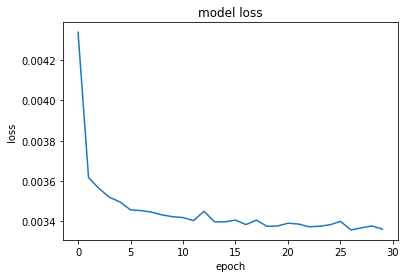

<Figure size 432x288 with 0 Axes>

In [85]:
srcnn_model = model()
srcnn_model.summary()
data, label = read_training_data("./train.h5")
    # srcnn_model.load_weights("m_model_adam.h5")
history=srcnn_model.fit(data, label, batch_size=128, nb_epoch=30)
srcnn_model.save_weights("m_model_adam30_64.h5")
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig("m_model_adam30_ce.png")


# Final rediction from main function callding the predict() function

C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", filters=64, use_bias=True, kernel_size=(9, 9), kernel_initializer="he_normal", input_shape=(None, Non..., padding="valid")`
  after removing the cwd from sys.path.
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", filters=32, padding="valid", use_bias=True, kernel_size=(1, 1), kernel_initializer="he_normal")`
  
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", filters=1, padding="valid", use_bias=True, kernel_size=(5, 5), kernel_initializer="he_normal")`
  


bicubic:
SRCNN:
18.550807961693828
dict_keys(['mean_squared_error', 'loss'])


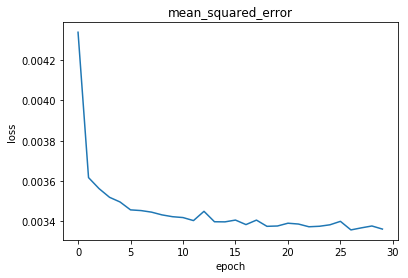

Tensor("conv2d_107/Relu:0", shape=(?, ?, ?, 32), dtype=float32)


<Figure size 432x288 with 0 Axes>

In [91]:
if __name__ == "__main__":
    #train()
    predict()

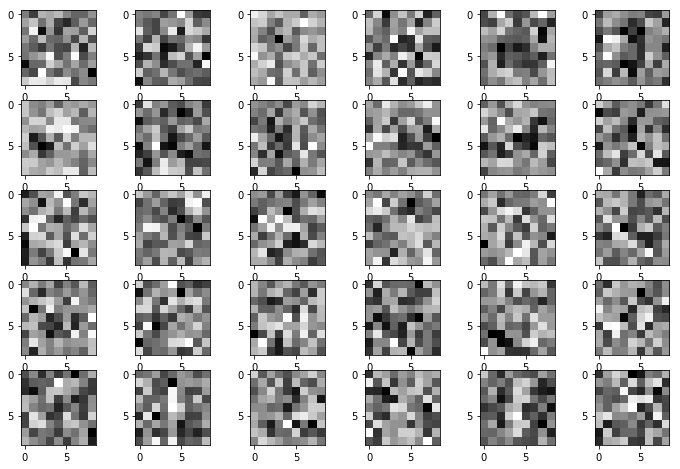

In [95]:
weight_conv2d_1 = history.model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 6
row_size = 5
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1